<a href="https://colab.research.google.com/github/michaelfarayola7/Data-Science-ML-Projects/blob/main/Handling_Overfitting_in_Deep_Neural_Network_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("/content/sonar.csv", header=None, skiprows = 1)
df.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
178,0.0197,0.0394,0.0384,0.0076,0.0251,0.0629,0.0747,0.0578,0.1357,0.1695,...,0.0134,0.0097,0.0042,0.0058,0.0072,0.0041,0.0045,0.0047,0.0054,Mine
93,0.0459,0.0437,0.0347,0.0456,0.0067,0.0890,0.1798,0.1741,0.1598,0.1408,...,0.0067,0.0032,0.0109,0.0164,0.0151,0.0070,0.0085,0.0117,0.0056,Rock
81,0.0100,0.0194,0.0155,0.0489,0.0839,0.1009,0.1627,0.2071,0.2696,0.2990,...,0.0130,0.0073,0.0077,0.0075,0.0060,0.0080,0.0019,0.0053,0.0019,Rock
116,0.0094,0.0333,0.0306,0.0376,0.1296,0.1795,0.1909,0.1692,0.1870,0.1725,...,0.0153,0.0112,0.0241,0.0164,0.0055,0.0078,0.0055,0.0091,0.0067,Mine
98,0.1313,0.2339,0.3059,0.4264,0.4010,0.1791,0.1853,0.0055,0.1929,0.2231,...,0.0362,0.0210,0.0154,0.0180,0.0013,0.0106,0.0127,0.0178,0.0231,Mine


In [3]:
X = df.drop(60, axis=1)
y = df[60]
y.head()

0    Rock
1    Rock
2    Rock
3    Rock
4    Rock
Name: 60, dtype: object

In [4]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

y = encoder.fit_transform(y)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)


Building NN

In [6]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [7]:
model = Sequential([
    Dense(80, input_dim=60, activation='relu'),
    Dense(30, activation='relu'),
    Dense(15, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [8]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics =['accuracy'])


In [9]:
#if we have a validation dataset, we could have initialize them as validation_split = (X_val, y_val)
H = model.fit(X_train, y_train, batch_size = 8, epochs=100, validation_split=0.3)

Epoch 1/100
14/14 [==============================] - 5s 128ms/step - loss: 0.6999 - accuracy: 0.4954 - val_loss: 0.6810 - val_accuracy: 0.6170
Epoch 2/100
14/14 [==============================] - 0s 15ms/step - loss: 0.6829 - accuracy: 0.5963 - val_loss: 0.6686 - val_accuracy: 0.7021
Epoch 3/100
14/14 [==============================] - 0s 22ms/step - loss: 0.6705 - accuracy: 0.6881 - val_loss: 0.6570 - val_accuracy: 0.7660
Epoch 4/100
14/14 [==============================] - 0s 20ms/step - loss: 0.6557 - accuracy: 0.6789 - val_loss: 0.6415 - val_accuracy: 0.7447
Epoch 5/100
14/14 [==============================] - 0s 19ms/step - loss: 0.6376 - accuracy: 0.7339 - val_loss: 0.6252 - val_accuracy: 0.7872
Epoch 6/100
14/14 [==============================] - 0s 21ms/step - loss: 0.6290 - accuracy: 0.7615 - val_loss: 0.6038 - val_accuracy: 0.8085
Epoch 7/100
14/14 [==============================] - 0s 15ms/step - loss: 0.6053 - accuracy: 0.7431 - val_loss: 0.5801 - val_accuracy: 0.8085
Epoch

In [10]:
loss, acc = model.evaluate(X_test, y_test)
print('Test Accuracy: ', acc*100)

2/2 [==============================] - 0s 8ms/step - loss: 1.2853 - accuracy: 0.7500
Test Accuracy:  75.0


In [11]:
loss, acc = model.evaluate(X_train, y_train)
print('Test Accuracy: ', acc*100)

5/5 [==============================] - 0s 3ms/step - loss: 0.3203 - accuracy: 0.9487
Test Accuracy:  94.87179517745972


Our model is overfitting

In [12]:
H.history

{'loss': [0.6999016404151917,
  0.6828750371932983,
  0.6705049276351929,
  0.6557495594024658,
  0.637619137763977,
  0.6290194988250732,
  0.6053414940834045,
  0.5793203115463257,
  0.5554553866386414,
  0.5305538773536682,
  0.5007599592208862,
  0.4743932783603668,
  0.4570781886577606,
  0.43331223726272583,
  0.3972696363925934,
  0.38915103673934937,
  0.3670586049556732,
  0.3440658748149872,
  0.3370806574821472,
  0.3582140803337097,
  0.334711492061615,
  0.313492089509964,
  0.2857547402381897,
  0.27319249510765076,
  0.2674390375614166,
  0.24514669179916382,
  0.2394360899925232,
  0.22880737483501434,
  0.23010611534118652,
  0.20922952890396118,
  0.228487029671669,
  0.20393458008766174,
  0.22083033621311188,
  0.1920381784439087,
  0.17540661990642548,
  0.16278888285160065,
  0.14841200411319733,
  0.1455032229423523,
  0.1369989663362503,
  0.1318393349647522,
  0.12551000714302063,
  0.13260897994041443,
  0.11709272861480713,
  0.1065257266163826,
  0.108420953

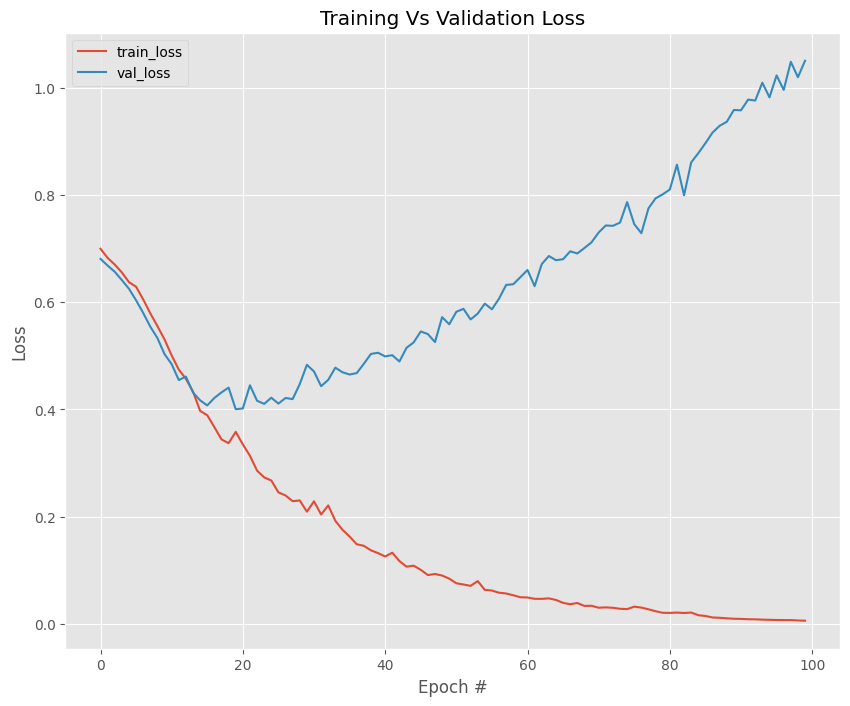

In [13]:
import matplotlib.pyplot as plt


epochs = np.arange(0, len(H.history["loss"]))
plt.figure(figsize=(10,8))


# plot training and validation loss
plt.style.use("ggplot")
plt.plot(epochs, H.history["loss"], label="train_loss")
plt.plot(epochs, H.history["val_loss"], label="val_loss")
plt.title("Training Vs Validation Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()

In [14]:
epochs

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

Adding L2 regularizer from Keras

In [15]:
#The below code can be added to any of the layers and we can specify the penalty value or alpha valua, here it is 0.1
#kernel_regularizer=tf.keras.regularizers.l2(0.1)



model = Sequential([
    Dense(80, input_dim=60, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.1)),
    Dense(30, activation='relu'),
    Dense(15, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.1)),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

H = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_split=0.3)

Epoch 1/100
14/14 [==============================] - 1s 23ms/step - loss: 8.8649 - accuracy: 0.4312 - val_loss: 8.0628 - val_accuracy: 0.5532
Epoch 2/100
14/14 [==============================] - 0s 7ms/step - loss: 7.4670 - accuracy: 0.5413 - val_loss: 6.7841 - val_accuracy: 0.5319
Epoch 3/100
14/14 [==============================] - 0s 6ms/step - loss: 6.2831 - accuracy: 0.5505 - val_loss: 5.7095 - val_accuracy: 0.5319
Epoch 4/100
14/14 [==============================] - 0s 7ms/step - loss: 5.2925 - accuracy: 0.5505 - val_loss: 4.8177 - val_accuracy: 0.5319
Epoch 5/100
14/14 [==============================] - 0s 6ms/step - loss: 4.4707 - accuracy: 0.5780 - val_loss: 4.0790 - val_accuracy: 0.5957
Epoch 6/100
14/14 [==============================] - 0s 6ms/step - loss: 3.7916 - accuracy: 0.5780 - val_loss: 3.4699 - val_accuracy: 0.5532
Epoch 7/100
14/14 [==============================] - 0s 6ms/step - loss: 3.2336 - accuracy: 0.5596 - val_loss: 2.9679 - val_accuracy: 0.5532
Epoch 8/100


In [16]:
loss, acc = model.evaluate(X_test, y_test)
print('Test Accuracy: ', acc*100)

2/2 [==============================] - 0s 7ms/step - loss: 0.6137 - accuracy: 0.7692
Test Accuracy:  76.92307829856873


In [17]:
loss, acc = model.evaluate(X_train, y_train)
print('Test Accuracy: ', acc*100)

5/5 [==============================] - 0s 3ms/step - loss: 0.4613 - accuracy: 0.9038
Test Accuracy:  90.38461446762085


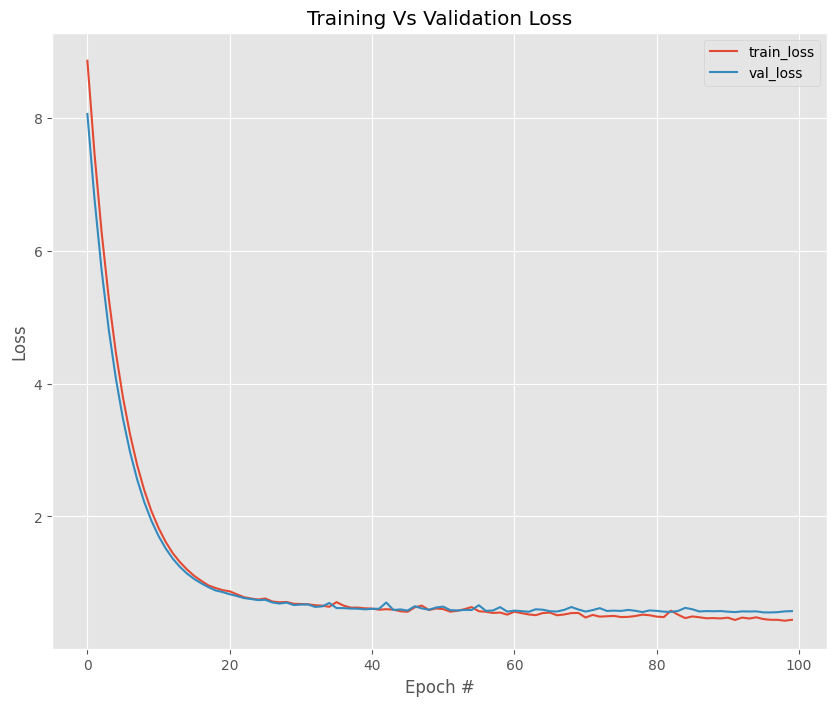

In [18]:
import matplotlib.pyplot as plt


epochs = np.arange(0, len(H.history["loss"]))
plt.figure(figsize=(10,8))


# plot training and validation loss
plt.style.use("ggplot")
plt.plot(epochs, H.history["loss"], label="train_loss")
plt.plot(epochs, H.history["val_loss"], label="val_loss")
plt.title("Training Vs Validation Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()

In [19]:
#The below code can be added to any of the layers and we can specify the penalty value or alpha valua, here it is 0.1
#kernel_regularizer=tf.keras.regularizers.l2(0.1)



model = Sequential([
    Dense(80, input_dim=60, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.1)),
    Dense(30, activation='relu'),
    Dense(15, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

H = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_split=0.3)

Epoch 1/100
14/14 [==============================] - 1s 22ms/step - loss: 6.9527 - accuracy: 0.4495 - val_loss: 6.2651 - val_accuracy: 0.4894
Epoch 2/100
14/14 [==============================] - 0s 6ms/step - loss: 5.7549 - accuracy: 0.6055 - val_loss: 5.1797 - val_accuracy: 0.5745
Epoch 3/100
14/14 [==============================] - 0s 6ms/step - loss: 4.7545 - accuracy: 0.6330 - val_loss: 4.2789 - val_accuracy: 0.7660
Epoch 4/100
14/14 [==============================] - 0s 6ms/step - loss: 3.9274 - accuracy: 0.6789 - val_loss: 3.5357 - val_accuracy: 0.5957
Epoch 5/100
14/14 [==============================] - 0s 6ms/step - loss: 3.2498 - accuracy: 0.5963 - val_loss: 2.9316 - val_accuracy: 0.6383
Epoch 6/100
14/14 [==============================] - 0s 5ms/step - loss: 2.7144 - accuracy: 0.6514 - val_loss: 2.4479 - val_accuracy: 0.7234
Epoch 7/100
14/14 [==============================] - 0s 6ms/step - loss: 2.2672 - accuracy: 0.6147 - val_loss: 2.0626 - val_accuracy: 0.5957
Epoch 8/100


In [20]:
loss, acc = model.evaluate(X_test, y_test)
print('Test Accuracy: ', acc*100)

2/2 [==============================] - 0s 7ms/step - loss: 0.6958 - accuracy: 0.8077
Test Accuracy:  80.7692289352417


In [21]:
loss, acc = model.evaluate(X_train, y_train)
print('Test Accuracy: ', acc*100)

5/5 [==============================] - 0s 3ms/step - loss: 0.3251 - accuracy: 0.9359
Test Accuracy:  93.58974099159241


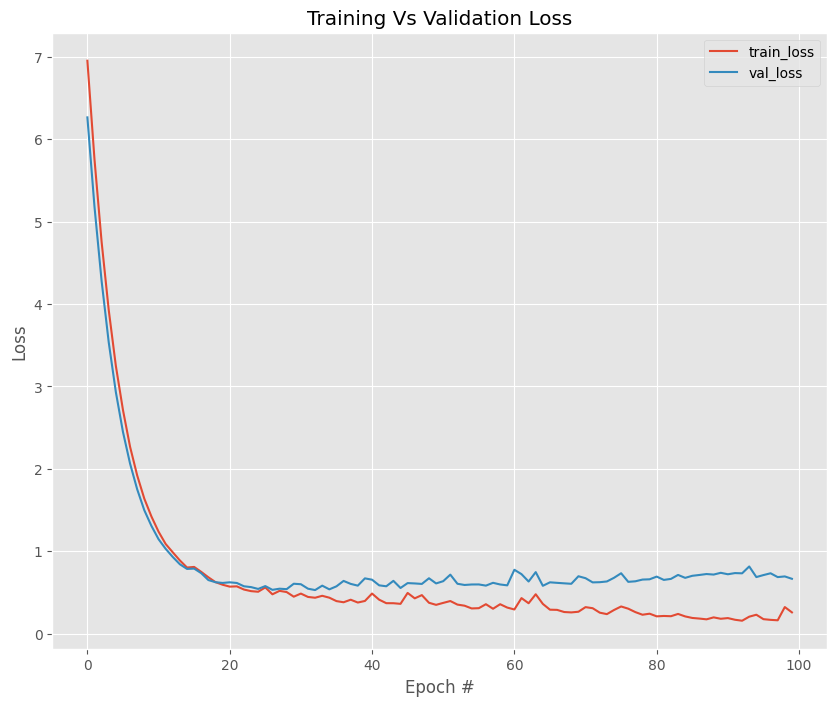

In [22]:
import matplotlib.pyplot as plt


epochs = np.arange(0, len(H.history["loss"]))
plt.figure(figsize=(10,8))


# plot training and validation loss
plt.style.use("ggplot")
plt.plot(epochs, H.history["loss"], label="train_loss")
plt.plot(epochs, H.history["val_loss"], label="val_loss")
plt.title("Training Vs Validation Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()

Adding dropout

In [23]:
#kernel_regularizer=tf.keras.regularizers.l2(0.1)
model = Sequential([
    Dense(80, input_dim=60, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.1)),
    Dropout(0.1),
    Dense(30, activation='relu'),
    Dense(15, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.1)),
    Dropout(0.1),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

H = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_split=0.3)

Epoch 1/100
14/14 [==============================] - 1s 22ms/step - loss: 8.8139 - accuracy: 0.5138 - val_loss: 8.0216 - val_accuracy: 0.5957
Epoch 2/100
14/14 [==============================] - 0s 6ms/step - loss: 7.4425 - accuracy: 0.6147 - val_loss: 6.7727 - val_accuracy: 0.5319
Epoch 3/100
14/14 [==============================] - 0s 5ms/step - loss: 6.2776 - accuracy: 0.5688 - val_loss: 5.7186 - val_accuracy: 0.5319
Epoch 4/100
14/14 [==============================] - 0s 6ms/step - loss: 5.3049 - accuracy: 0.5963 - val_loss: 4.8348 - val_accuracy: 0.5745
Epoch 5/100
14/14 [==============================] - 0s 6ms/step - loss: 4.4903 - accuracy: 0.6330 - val_loss: 4.1059 - val_accuracy: 0.5745
Epoch 6/100
14/14 [==============================] - 0s 6ms/step - loss: 3.8213 - accuracy: 0.6606 - val_loss: 3.4997 - val_accuracy: 0.6170
Epoch 7/100
14/14 [==============================] - 0s 5ms/step - loss: 3.2669 - accuracy: 0.6422 - val_loss: 2.9972 - val_accuracy: 0.5745
Epoch 8/100


In [24]:
loss, acc = model.evaluate(X_train, y_train)
print('Test Accuracy: ', acc*100)

5/5 [==============================] - 0s 4ms/step - loss: 0.4598 - accuracy: 0.8974
Test Accuracy:  89.74359035491943


In [25]:
loss, acc = model.evaluate(X_test, y_test)
print('Test Accuracy: ', acc*100)

2/2 [==============================] - 0s 8ms/step - loss: 0.6243 - accuracy: 0.7500
Test Accuracy:  75.0


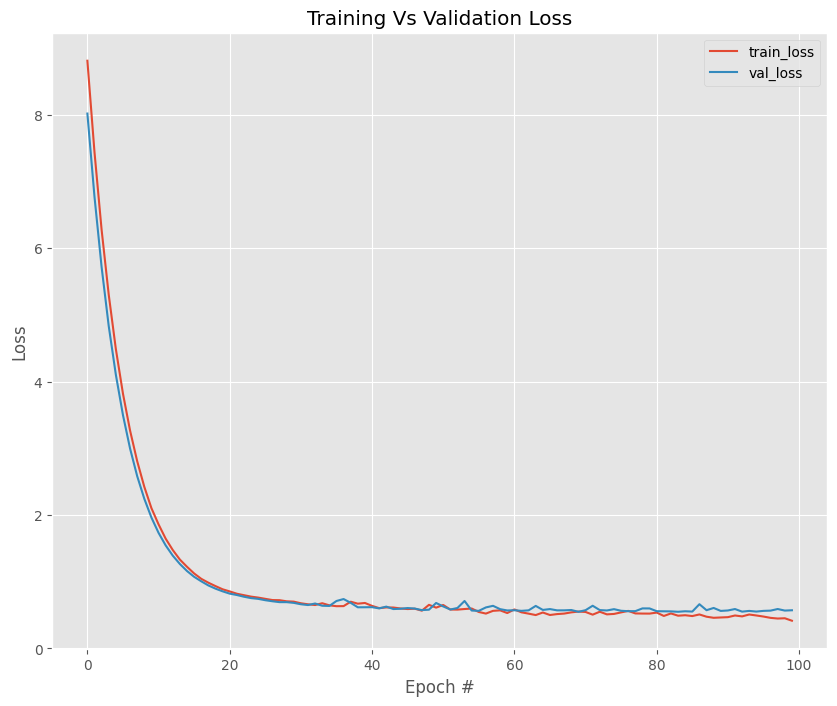

In [26]:
import matplotlib.pyplot as plt


epochs = np.arange(0, len(H.history["loss"]))
plt.figure(figsize=(10,8))


# plot training and validation loss
plt.style.use("ggplot")
plt.plot(epochs, H.history["loss"], label="train_loss")
plt.plot(epochs, H.history["val_loss"], label="val_loss")
plt.title("Training Vs Validation Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()

Early Stopping

In [27]:
#callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',verbose=1, patience=5)

In [28]:
from tensorflow.keras.callbacks import EarlyStopping

In [29]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)


In [30]:
#kernel_regularizer=tf.keras.regularizers.l2(0.1)
model = Sequential([
    Dense(80, input_dim=60, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.1)),
    Dropout(0.1),
    Dense(30, activation='relu'),
    Dense(15, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.1)),
    Dropout(0.1),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

H = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_split=0.3, callbacks=early_stop)

Epoch 1/100
14/14 [==============================] - 1s 22ms/step - loss: 8.9000 - accuracy: 0.4404 - val_loss: 8.0926 - val_accuracy: 0.4894
Epoch 2/100
14/14 [==============================] - 0s 6ms/step - loss: 7.4955 - accuracy: 0.5046 - val_loss: 6.8124 - val_accuracy: 0.7021
Epoch 3/100
14/14 [==============================] - 0s 5ms/step - loss: 6.3102 - accuracy: 0.6514 - val_loss: 5.7371 - val_accuracy: 0.6383
Epoch 4/100
14/14 [==============================] - 0s 6ms/step - loss: 5.3210 - accuracy: 0.6514 - val_loss: 4.8441 - val_accuracy: 0.6383
Epoch 5/100
14/14 [==============================] - 0s 7ms/step - loss: 4.5015 - accuracy: 0.6055 - val_loss: 4.1088 - val_accuracy: 0.5319
Epoch 6/100
14/14 [==============================] - 0s 5ms/step - loss: 3.8164 - accuracy: 0.5688 - val_loss: 3.4961 - val_accuracy: 0.5745
Epoch 7/100
14/14 [==============================] - 0s 5ms/step - loss: 3.2566 - accuracy: 0.5963 - val_loss: 2.9911 - val_accuracy: 0.5957
Epoch 8/100


In [31]:
early_stop = EarlyStopping(monitor='val_accuracy', mode='min', verbose=1, patience=5)


In [32]:
#kernel_regularizer=tf.keras.regularizers.l2(0.1)
model = Sequential([
    Dense(80, input_dim=60, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.1)),
    Dropout(0.1),
    Dense(30, activation='relu'),
    Dense(15, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.1)),
    Dropout(0.1),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

H = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_split=0.3, callbacks=early_stop)

Epoch 1/100
14/14 [==============================] - 1s 22ms/step - loss: 8.8947 - accuracy: 0.5596 - val_loss: 8.0900 - val_accuracy: 0.5319
Epoch 2/100
14/14 [==============================] - 0s 6ms/step - loss: 7.4915 - accuracy: 0.5138 - val_loss: 6.8005 - val_accuracy: 0.5319
Epoch 3/100
14/14 [==============================] - 0s 6ms/step - loss: 6.3002 - accuracy: 0.5229 - val_loss: 5.7216 - val_accuracy: 0.4894
Epoch 4/100
14/14 [==============================] - 0s 6ms/step - loss: 5.3070 - accuracy: 0.5963 - val_loss: 4.8291 - val_accuracy: 0.5319
Epoch 5/100
14/14 [==============================] - 0s 6ms/step - loss: 4.4862 - accuracy: 0.6055 - val_loss: 4.0891 - val_accuracy: 0.5745
Epoch 6/100
14/14 [==============================] - 0s 7ms/step - loss: 3.8020 - accuracy: 0.6330 - val_loss: 3.4802 - val_accuracy: 0.5745
Epoch 7/100
14/14 [==============================] - 0s 7ms/step - loss: 3.2492 - accuracy: 0.5780 - val_loss: 2.9791 - val_accuracy: 0.5532
Epoch 8/100


In [33]:
loss, acc = model.evaluate(X_train, y_train)
print('Test Accuracy: ', acc*100)

5/5 [==============================] - 0s 3ms/step - loss: 2.5683 - accuracy: 0.5897
Test Accuracy:  58.974361419677734


In [34]:
loss, acc = model.evaluate(X_test, y_test)
print('Test Accuracy: ', acc*100)

2/2 [==============================] - 0s 9ms/step - loss: 2.5711 - accuracy: 0.5192
Test Accuracy:  51.923078298568726


ModelCheckpoint Callback

In [36]:
from tensorflow.keras.callbacks import ModelCheckpoint

model = Sequential([
    Dense(80, input_dim=60, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.1)),
    Dropout(0.1),
    Dense(30, activation='relu'),
    Dense(15, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.1)),
    Dropout(0.1),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [37]:
#Our checkpoint
checkpoint = ModelCheckpoint('SOMETHINGELSE', monitor="val_loss", mode="min", save_best_only=True, verbose=1),

#Our earlystopping
earlystopping = EarlyStopping(monitor='val_loss',verbose=1, patience=5)

In [38]:
callbacks = [checkpoint,earlystopping]

In [41]:
H = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_split=0.3, callbacks = callbacks)

Epoch 1/100
13/14 [==========================>...] - ETA: 0s - loss: 0.4394 - accuracy: 0.8846
Epoch 1: val_loss improved from inf to 0.55584, saving model to SOMETHINGELSE
14/14 [==============================] - 3s 207ms/step - loss: 0.4602 - accuracy: 0.8807 - val_loss: 0.5558 - val_accuracy: 0.8298
Epoch 2/100
 9/14 [==================>...........] - ETA: 0s - loss: 0.4171 - accuracy: 0.9167
Epoch 2: val_loss did not improve from 0.55584
14/14 [==============================] - 0s 11ms/step - loss: 0.4338 - accuracy: 0.9174 - val_loss: 0.5686 - val_accuracy: 0.8298
Epoch 3/100
12/14 [========================>.....] - ETA: 0s - loss: 0.4387 - accuracy: 0.9062
Epoch 3: val_loss did not improve from 0.55584
14/14 [==============================] - 0s 13ms/step - loss: 0.4456 - accuracy: 0.8899 - val_loss: 0.5857 - val_accuracy: 0.8298
Epoch 4/100
 1/14 [=>............................] - ETA: 0s - loss: 0.4791 - accuracy: 0.7500
Epoch 4: val_loss did not improve from 0.55584
14/14 [===

In [42]:
loss, acc=model.evaluate(X_test, y_test)
print('Test Accuracy: ', acc*100)

2/2 [==============================] - 0s 10ms/step - loss: 0.6367 - accuracy: 0.7692
Test Accuracy:  76.92307829856873


Load Best Weight

In [46]:
model = Sequential([
Dense(80, input_dim=60, activation='relu'),
Dense(30, activation='relu'),
Dense(15, activation='relu'),
Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])







model.load_weights("/content/SOMETHINGELSE")
print(model.evaluate(X_test, y_test))

2/2 [==============================] - 0s 18ms/step - loss: 0.4770 - accuracy: 0.7500
[0.47695767879486084, 0.75]
